In [1]:
import pickle

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
batch_1 = unpickle('/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/data_batch_5')

In [5]:
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


for i,f in enumerate(batch_5[b'filenames']):
    f = f.decode('utf-8')
    d = batch_5[b'data'][i]
    im = np.transpose(d.reshape(3,32,32),(1,2,0))
    cv2.imwrite(f,cv2.cvtColor(im,cv2.COLOR_RGB2BGR))

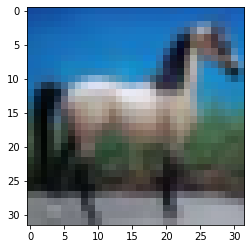

In [6]:
d = batch_5[b'data'][120]
plt.imshow(np.transpose(d.reshape(3,32,32),(1,2,0)))

In [7]:
## np.unique(batch_1[b'labels'],return_counts=True)

In [8]:
import os

In [9]:
def get_size(batch,path):
    batch[b'size'] = []
    for i,f in enumerate(batch[b'filenames']):
        f = f.decode('utf-8')
        batch[b'size'].append(os.path.getsize(path+f))
    return batch

In [10]:
batch_2 = get_size(batch_2,'/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/batch_2/')
batch_1 = get_size(batch_1,'/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/batch_1/')
batch_3 = get_size(batch_3,'/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/batch_3/')
batch_4 = get_size(batch_4,'/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/batch_4/')
batch_5 = get_size(batch_5,'/mnt/efs/Data/CIFAR/orig_data/cifar-10-batches-py/batch_5/')

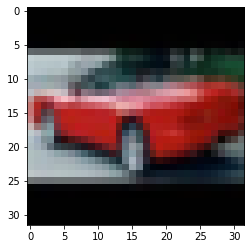

In [26]:
d = batch_3[b'data'][4680,:]
plt.imshow(np.transpose(d.reshape(3,32,32),(1,2,0)))

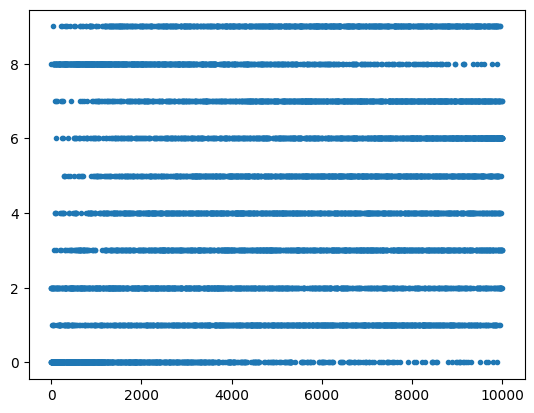

In [18]:
labs = batch_2[b'labels']
plt.plot(np.asarray(labs)[np.argsort(batch_2[b'size'])],'.')

(array([2.000e+00, 2.000e+00, 2.200e+01, 5.000e+01, 1.390e+02, 4.700e+02,
        1.267e+03, 3.236e+03, 4.199e+03, 6.130e+02]),
 array([ 461. ,  720.6,  980.2, 1239.8, 1499.4, 1759. , 2018.6, 2278.2,
        2537.8, 2797.4, 3057. ]),
 <BarContainer object of 10 artists>)

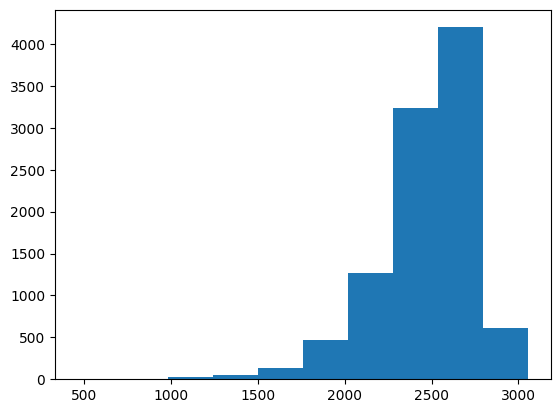

In [38]:
plt.hist(batch_1[b'size'])

In [19]:
picks = np.argsort(batch_1[b'size'])
batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames', b'size'])

In [20]:
def select(batch,sorted_array,propotion=0.5):
    new_batch = {}
    new_batch[b'filenames'] = []
    new_batch[b'batch_label'] = batch[b'batch_label']
    new_batch[b'labels'] = []
    new_batch[b'data'] = []
    count = np.zeros((10,1))
    _,true_count = np.unique(batch[b'labels'],return_counts=True)
    for i in sorted_array:
        label = batch[b'labels'][i]
        if count[label]< true_count[label]*propotion:
            count[label] += 1
            new_batch[b'filenames'].append(batch[b'filenames'][i])
            new_batch[b'labels'].append(batch[b'labels'][i])
            new_batch[b'data'].append(batch[b'data'][i].tolist())
    new_batch[b'data'] = np.asarray(new_batch[b'data'])
    return new_batch

In [21]:
def select_random(batch,propotion=0.5):
    new_batch = {}
    new_batch[b'filenames'] = []
    new_batch[b'batch_label'] = batch[b'batch_label']
    new_batch[b'labels'] = []
    new_batch[b'data'] = []
    
    for i,f in enumerate(batch[b'filenames']):
        label = batch[b'labels'][i]
        if np.random.rand()<propotion:
            #count[label] += 1
            new_batch[b'filenames'].append(batch[b'filenames'][i])
            new_batch[b'labels'].append(batch[b'labels'][i])
            new_batch[b'data'].append(batch[b'data'][i].tolist())
    new_batch[b'data'] = np.asarray(new_batch[b'data'])
    return new_batch

In [22]:
arr = np.argsort(batch_1[b'size'])
arr[::-1]

array([5265, 6510,  493, ..., 9985, 9881, 5867])

In [39]:
#arr = np.random.permutation(10000)
arr = np.argsort(batch_1[b'size'])
nb1 = select(batch_1,arr[::-1],propotion=0.25)

#arr = np.random.permutation(10000)
arr = np.argsort(batch_2[b'size'])
nb2 = select(batch_2,arr[::-1])
arr = np.argsort(batch_3[b'size'])
#arr = np.random.permutation(10000)
nb3 = select(batch_3,arr[::-1])
arr = np.argsort(batch_4[b'size'])
#arr = np.random.permutation(10000)
nb4 = select(batch_4,arr[::-1])
arr = np.argsort(batch_5[b'size'])
#arr = np.random.permutation(10000)
nb5 = select(batch_5,arr[::-1])


In [49]:
np.sort(arr)

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [124]:
nb1 = select_random(batch_1)
nb2 = select_random(batch_2)
nb3 = select_random(batch_3)
nb4 = select_random(batch_4)
nb5 = select_random(batch_5)

In [24]:
np.unique(batch_2[b'labels'],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 984, 1007, 1010,  995, 1010,  988, 1008, 1026,  987,  985]))

In [25]:
_,aa= np.unique(nb2[b'labels'],return_counts=True)
np.sum(aa)
aa

array([492, 504, 505, 498, 505, 494, 504, 513, 494, 493])

In [40]:
np.unique(nb1[b'labels'],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([252, 244, 258, 254, 250, 235, 258, 251, 257, 246]))

In [27]:
np.unique(nb3[b'labels'],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([497, 521, 483, 499, 495, 515, 489, 508, 481, 515]))

In [28]:
np.unique(nb4[b'labels'],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([502, 482, 521, 488, 502, 511, 502, 491, 512, 492]))

In [29]:
np.unique(nb5[b'labels'],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([507, 507, 476, 508, 499, 513, 490, 489, 502, 511]))

In [134]:
20%20

0

In [42]:
!mkdir /mnt/efs/Data/CIFAR/orig_data_sz/

In [45]:
with open('/mnt/efs/Data/CIFAR/orig_data_sz//data_batch_1','wb') as fp:
    pickle.dump(batch_1,fp)
with open('/mnt/efs/Data/CIFAR/orig_data_sz//data_batch_2','wb') as fp:
    pickle.dump(batch_2,fp)
with open('/mnt/efs/Data/CIFAR/orig_data_sz//data_batch_3','wb') as fp:
    pickle.dump(batch_3,fp)
with open('/mnt/efs/Data/CIFAR/orig_data_sz//data_batch_4','wb') as fp:
    pickle.dump(batch_4,fp)
with open('/mnt/efs/Data/CIFAR/orig_data_sz//data_batch_5','wb') as fp:
    pickle.dump(batch_5,fp)

In [33]:
with open('/mnt/efs/Data/CIFAR/hi_data/data_batch_3','rb') as fp:
    hi_3 = pickle.load(fp,encoding='latin')
with open('/mnt/efs/Data/CIFAR/random_data//data_batch_3','rb') as fp:
    rand_3 = pickle.load(fp,encoding='latin')
with open('/mnt/efs/Data/CIFAR/lo_data//data_batch_3','rb') as fp:
    lo_3 = pickle.load(fp,encoding='latin')

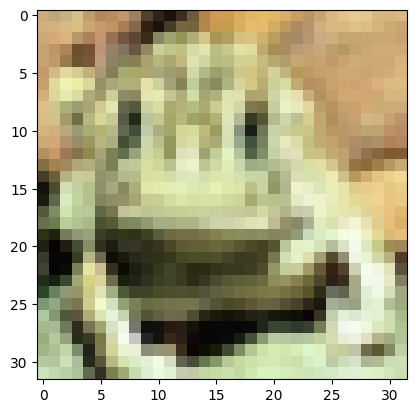

In [34]:
d = hi_3[b'data'][100]
plt.imshow(np.transpose(d.reshape(3,32,32),(1,2,0)))

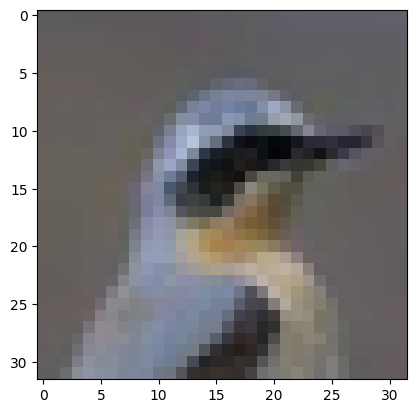

In [36]:
d = rand_3[b'data'][100]
plt.imshow(np.transpose(d.reshape(3,32,32),(1,2,0)))

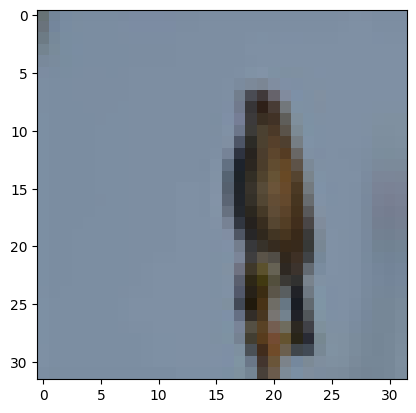

In [37]:
d = lo_3[b'data'][100]
plt.imshow(np.transpose(d.reshape(3,32,32),(1,2,0)))

In [110]:
import glob
files = glob.glob('/Users/rsingh/Data/cifar-10-batches-py/random/data_batch_?')
for f in files:
    with open(f,'rb') as fp:
        d = pickle.load(fp,encoding='latin')
        print(len(d[b'filenames']))

5003
5002
5002
5003
5003


In [107]:
d.keys()

dict_keys([b'filenames', b'batch_label', b'labels', b'data'])

In [50]:
import scipy.io

In [53]:
A = scipy.io.loadmat('pytorch-cifar_new/x.mat')['a']

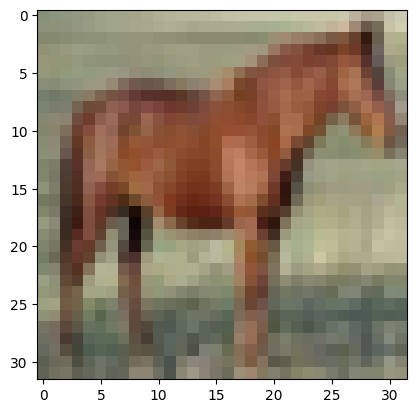

In [54]:
plt.imshow(A)

In [1]:
from torchvision import datasets, transforms

In [4]:
    num_classes = 10
    train_dataset = datasets.CIFAR10(
        root='/tmp/data/',
        train=True,
        transform=train_transform,
        download=True)


Files already downloaded and verified


In [3]:
train_transform = transforms.Compose([])

In [5]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /tmp/data/
    Split: Train
    StandardTransform
Transform: Compose(
           )

In [8]:
trainloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=100, shuffle=False, num_workers=1)

In [9]:
import torch

In [11]:
trainloader.dataset.train_list

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']